<a href="https://colab.research.google.com/github/Shrivastavadev/Retinal-Disease-detection-using-ML/blob/main/CNNs/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [3]:
# mounting data
from google.colab import drive
drive.mount('/content/drive')
path_dataset = "/content/drive/MyDrive/dataset_ML/RFMiD"
path_image_train = "/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/Training"
path_RFMiD_CSV = "/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/RFMiD_Training_Labels.csv"


Mounted at /content/drive


In [11]:
model_d= Xception(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(46,activation='softmax')(x) #FC-layer # 8 is the number of classification to be done
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 63, 63, 32)           864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 63, 63, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 63, 63, 32)           0         ['block1_conv1_bn[0][0]'

In [12]:
for layer in model.layers[:-8]:
    layer.trainable=False

for layer in model.layers[-8:]:
    layer.trainable=True

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 63, 63, 32)           864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 63, 63, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 63, 63, 32)           0         ['block1_conv1_bn[0][0]'

In [7]:
try:
  data =np.load("/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/temporary/Densenet121_data.npy")
  labels = np.load("/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/temporary/Densenet121_labels.npy")
except FileNotFoundError:
  data = []
  labels = []

  # Load the CSV file
  df = pd.read_csv(path_RFMiD_CSV)
  # Loop through each row in the CSV file
  for index, row in df.iterrows():
      # Load the image and resize it
      path_ = os.path.join(path_image_train+ "/" + str(row['ID'])+".png")
      print(row["ID"],end=" ")
      image = cv2.imread(path_)
      image = cv2.resize(image, (128, 128))
      print("image data added")
      image = img_to_array(image)
      data.append(image)

      # Get the labels for this image
      labels_row = [row[label] for label in df.columns if label != 'ID']
      label_array = np.array(labels_row)
      labels.append(label_array)

  # Convert the data and labels to numpy arrays
  data = np.array(data, dtype="float32") / 255.0 ##### this step is important as it converts the images pixle value from range 1-0 ######
  labels = np.array(labels)
  path_save_data="/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/Densenet121_data.npy"
  path_save_label="/content/drive/MyDrive/dataset_ML/RFMiD/Training_Set/Training_Set/Densenet121_labels.npy"
  np.save(path_save_data, data)
  np.save(path_save_label, labels)
else:
  print("data and labels loaded")

print(data.shape)
print(labels.shape)

1 image data added
2 image data added
3 image data added
4 image data added
5 image data added
6 image data added
7 image data added
8 image data added
9 image data added
10 image data added
11 image data added
12 image data added
13 image data added
14 image data added
15 image data added
16 image data added
17 image data added
18 image data added
19 image data added
20 image data added
21 image data added
22 image data added
23 image data added
24 image data added
25 image data added
26 image data added
27 image data added
28 image data added
29 image data added
30 image data added
31 image data added
32 image data added
33 image data added
34 image data added
35 image data added
36 image data added
37 image data added
38 image data added
39 image data added
40 image data added
41 image data added
42 image data added
43 image data added
44 image data added
45 image data added
46 image data added
47 image data added
48 image data added
49 image data added
50 image data added
51 image 

In [8]:
# train test split:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.2,random_state=42)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(1536, 128, 128, 3) (384, 128, 128, 3)
(1536, 46) (384, 46)


In [13]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator()


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/50

Epoch 1: val_loss improved from inf to 9.05110, saving model to model.h5
12/12 - 13s - loss: 8.5132 - accuracy: 0.1758 - val_loss: 9.0511 - val_accuracy: 6.5104e-04 - lr: 0.0010 - 13s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 9.05110 to 8.41276, saving model to model.h5
12/12 - 5s - loss: 7.3754 - accuracy: 0.2448 - val_loss: 8.4128 - val_accuracy: 0.1165 - lr: 0.0010 - 5s/epoch - 376ms/step
Epoch 3/50

Epoch 3: val_loss improved from 8.41276 to 6.82456, saving model to model.h5
12/12 - 4s - loss: 6.9862 - accuracy: 0.3040 - val_loss: 6.8246 - val_accuracy: 0.3314 - lr: 0.0010 - 4s/epoch - 365ms/step
Epoch 4/50

Epoch 4: val_loss improved from 6.82456 to 6.14658, saving model to model.h5
12/12 - 5s - loss: 7.0366 - accuracy: 0.3281 - val_loss: 6.1466 - val_accuracy: 0.3880 - lr: 0.0010 - 5s/epoch - 426ms/step
Epoch 5/50

Epoch 5: val_loss improved from 6.14658 to 5.83990, saving model to model.h5
12/12 - 5s - loss: 6.8634 - accuracy: 0.2936 - val_loss: 5.8

In [14]:
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

12/12 [==============================] - 1s 49ms/step
Total-test-data; 384 	accurately-predicted-data: 242 	 wrongly-predicted-data:  142
Accuracy: 63.021 %


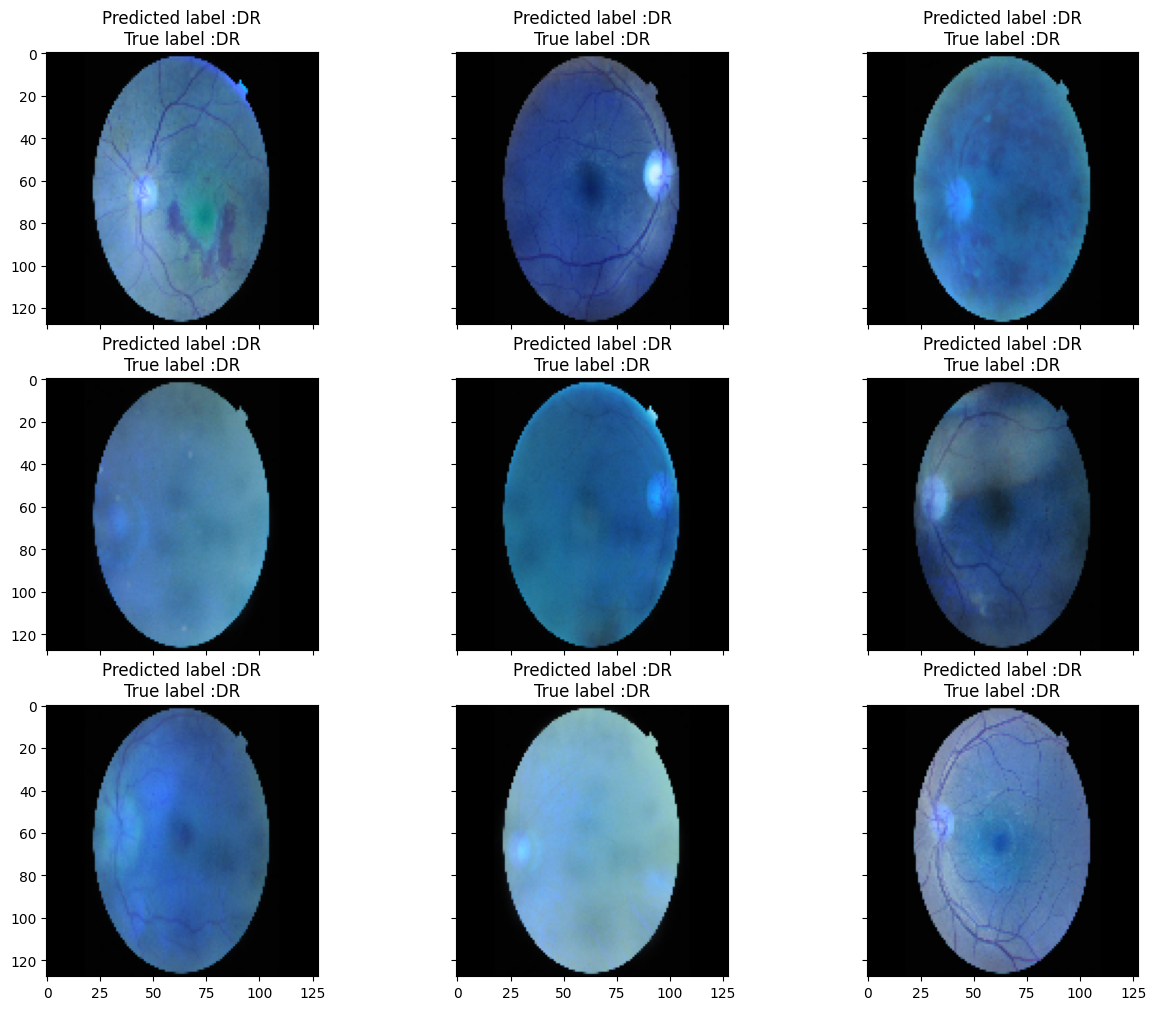

In [15]:
label = ['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO',
          'TSLN', 'ERM', 'LS', 'MS', 'CSR', 'ODC',
          'CRVO', 'AH', 'ODP', 'ODE', 'AION', 'PT',
          'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()